In [1]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir)


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#import sys
from core import expression_plots 
from core import io_library 
#from IPython.core.debugger import Tracer
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go


In [4]:

# Species List: S. Cerevisiae, K. Lactis, S. Bayanus, C. Glabrata, N. Castelli
species_list = ['Saccharomyces cerevisiae', 'Kluyveromyces lactis', 'Candida glabrata', 'Saccharomyces castellii' , 'Saccharomyces bayanus']
#filename of combined raw and perturbation expression data
fname_out_bases = ['SCer', 'KLac', 'CGla', 'SCas','SBay']




In [5]:
# For each species

# Optional: Parse original data file and make CSV for raw expression and perturbations
# Only need to do this the first time you use the data set.  Subsequent runs can read data directly from the CSV. 
parse_data = False

if parse_data: 
    io_library.make_data_tables(species_list,fname_out_bases, base_dir)



In [5]:
for jj in range(len(species_list)):
    #Load raw expression data
    fname = os.path.normpath(base_dir + "\microarray_data\\raw_exp\\"  + fname_out_bases[jj] + '_raw_exp.csv')
    raw_exp = pd.read_csv(fname, index_col = 'orf_name')
    print fname + ' raw expression dataset loaded'
    #extract mean expression only
    mean_gene_expression = raw_exp['Mean']
    mean_gene_expression.name = 'mean_gene_expression'
    #Run mean extraction histogram plot
    
    
    #Load data for microarrays
    fname = os.path.normpath(base_dir + "\microarray_data\\GSE36253_Growth\\"  + fname_out_bases[jj] + '_growth.csv' )
    growth_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
    print fname + ' growth microarray dataset loaded'
    
    #group by conditions and take mean
    growth_replicate_groups = growth_exp.groupby(axis = 1, level = 'conditions')
    growth_exp_avg = growth_replicate_groups.aggregate(np.mean)
    
    if species_list[jj] != 'Saccharomyces bayanus':
        #There is no stress dataset for S. bayanus
        fname = os.path.normpath(base_dir + "\microarray_data\\GSE38478_Stress\\"  + fname_out_bases[jj] + '_stress.csv' )
        stress_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
        print fname + ' stress microarray dataset loaded'
        
        #group by condition and take mean
        stress_replicate_groups = stress_exp.groupby(axis = 1, level = 'conditions')
        stress_exp_avg = stress_replicate_groups.aggregate(np.mean)
        
        #combine growth and stress average expression datasets. 
        if False in stress_exp_avg.index==growth_exp_avg.index:
            print "Error: ID mismatch between condition data. Species = {}".format(species)
            break
        condition_arrays = pd.concat([growth_exp_avg,stress_exp_avg], axis = 1)
    else:
        condition_arrays = growth_exp_avg
    
    #Run Promoter decision plots

    pct_expression = (0.90,1)
    pct_stability = (0.80,1)

    Nconds = len(condition_arrays.columns)
    weight_vector = [1 for kk in range(Nconds)]
    #Should I make this a unit vector?

    fig_fname =  os.path.normpath("C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\Bioinformatics\Microarrays\\20160215_promoter_Pick_CG_SB_NCAS\\"  + fname_out_bases[jj] + '_highexp_stable.png' )
    
    #sort_order is either ['stability_score',1] which means sort stability scores in ascending order or
    #['mean_gene_expression',0] which means sort mean_expression scores in descending order
    expression_plots.promoter_choice_plot(mean_gene_expression, condition_arrays, pct_expression, pct_stability, weight_vector, fig_fname, sort_order = ['stability_score',1], N_plotted = 20)
    print fig_fname + ' plotted and saved'


C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\raw_exp\SCer_raw_exp.csv raw expression dataset loaded
C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\GSE36253_Growth\SCer_growth.csv growth microarray dataset loaded
C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\GSE38478_Stress\SCer_stress.csv stress microarray dataset loaded


TypeError: promoter_choice_plot() got multiple values for keyword argument 'sort_order'

In [40]:
jj = 2 
#Load raw expression data
fname = os.path.normpath(base_dir + "\microarray_data\\raw_exp\\"  + fname_out_bases[jj] + '_raw_exp.csv')
raw_exp = pd.read_csv(fname, index_col = 'orf_name')
print fname + ' raw expression dataset loaded'
#extract mean expression only
mean_gene_expression = raw_exp['Mean']
mean_gene_expression.name = 'mean_gene_expression'
#Run mean extraction histogram plot


#Load data for microarrays
fname = os.path.normpath(base_dir + "\microarray_data\\GSE36253_Growth\\"  + fname_out_bases[jj] + '_growth.csv' )
growth_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
print fname + ' growth microarray dataset loaded'

#group by conditions and take mean
growth_replicate_groups = growth_exp.groupby(axis = 1, level = 'conditions')
growth_exp_avg = growth_replicate_groups.aggregate(np.mean)

if species_list[jj] != 'Saccharomyces bayanus':
    #There is no stress dataset for S. bayanus
    fname = os.path.normpath(base_dir + "\microarray_data\\GSE38478_Stress\\"  + fname_out_bases[jj] + '_stress.csv' )
    stress_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
    print fname + ' stress microarray dataset loaded'

    #group by condition and take mean
    stress_replicate_groups = stress_exp.groupby(axis = 1, level = 'conditions')
    stress_exp_avg = stress_replicate_groups.aggregate(np.mean)

    #combine growth and stress average expression datasets. 
    if False in stress_exp_avg.index==growth_exp_avg.index:
        print "Error: ID mismatch between condition data. Species = {}".format(species)
        #break
    condition_arrays = pd.concat([growth_exp_avg,stress_exp_avg], axis = 1)
else:
    condition_arrays = growth_exp_avg
    
#Run Promoter decision plots

pct_expression = (0.90,1)
pct_stability = (0.80,1)

Nconds = len(condition_arrays.columns)
weight_vector = [1 for kk in range(Nconds)]
#Should I make this a unit vector?

fig_fname =  os.path.normpath("C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\Bioinformatics\Microarrays\\20160215_promoter_Pick_CG_SB_NCAS\\"  + fname_out_bases[jj] + '_highexp_stable.png' )

#sort_order is either ['stability_score',1] which means sort stability scores in ascending order or
#['mean_gene_expression',0] which means sort mean_expression scores in descending order


C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\raw_exp\CGla_raw_exp.csv raw expression dataset loaded
C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\GSE36253_Growth\CGla_growth.csv growth microarray dataset loaded
C:\Users\Ben\Documents\GitHub\expression_broad_data\microarray_data\GSE38478_Stress\CGla_stress.csv stress microarray dataset loaded


In [41]:
#sort_order is either ['stability_score',1] which means sort stability scores in ascending order or
#['mean_gene_expression',0] which means sort mean_expression scores in descending order

#Calculate stability score
#set NaNs to zero for calculation of stability score, but save original array
condition_arrays_na0 = condition_arrays.fillna(0)
print tuple([weight_vector])
stability_scores = condition_arrays_na0.apply(expression_plots.stability_calc, axis =  1, args = tuple([weight_vector]) )
stability_scores.name = 'stability_score'
#Leave NaNs for visualization. 




([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],)


In [42]:

#Add on mean_gene_expression and stability_score column
mean_gene_expression.index = condition_arrays.index
condition_arrays = pd.concat([mean_gene_expression, stability_scores, condition_arrays], axis = 1)

#convert percentile to number of items
Ngenes = condition_arrays.index.size

expression_indices = [int(np.ceil(Ngenes*(1-percentile))) for percentile in pct_expression]
stability_indices = [int(np.ceil(Ngenes*(1-percentile))) for percentile in pct_stability]

#Flag data with desired mean expression
condition_arrays = condition_arrays.sort_values('mean_gene_expression',ascending = 0)
condition_arrays['top_N_expression'] = False
condition_arrays['top_N_expression'][expression_indices[1]:expression_indices[0]] = True

#Flag data with desired stability score
condition_arrays = condition_arrays.sort_values('stability_score',ascending = 1)
condition_arrays['top_N_stability'] = False
condition_arrays['top_N_stability'][stability_indices[1]:stability_indices[0]] = True

#extract data with both desired stability and mean scores. 
desired_genes = condition_arrays.loc[(condition_arrays['top_N_expression'] == True) & (condition_arrays['top_N_stability'] == True)]

#desired_genes = desired_genes.sort_values(sort_order[0],ascending = sort_order[1])

,,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060,top_N_expression,top_N_stability
ID,orf_name,,,,,,,,,,,,,,,,,,,,,
10301,CAGL0K02079g,-0.131332,0.693779,-0.119622,-0.243470,-0.179267,-0.116954,0.122764,0.113045,0.014514,0.155652,...,NaN,NaN,0.130266,0.257463,0.069566,0.076472,0.214117,-0.011092,True,True
12070,CAGL0C03608g,0.085725,0.848276,0.280785,0.160571,-0.602517,0.180745,0.162082,0.022420,0.100176,0.051958,...,0.286786,-0.009925,0.029658,0.180048,0.119627,-0.033622,-0.067979,-0.041599,True,True
11854,CAGL0M13629g,0.429600,0.957396,0.231493,0.162007,0.523245,0.166025,0.410288,-0.380391,0.089348,-0.101879,...,0.126396,0.183405,0.067607,0.215445,0.122711,0.042194,-0.257963,-0.030072,True,True
14674,CAGL0F05269g,0.107406,0.979752,-0.233976,-0.104431,-0.600580,-0.092055,-0.237542,-0.524032,-0.030095,-0.068516,...,-0.214778,-0.214922,-0.129480,0.014849,0.064783,0.063786,-0.230527,-0.054104,True,True
15213,CAGL0J05434g,0.124553,1.198442,0.036810,-0.553627,-0.838873,-0.063393,-0.399990,-0.291286,-0.037359,0.058830,...,0.239094,0.246287,-0.050984,-0.055319,-0.116770,-0.016016,-0.094655,-0.062823,True,True
11393,CAGL0I05720g,-0.174689,1.215851,0.157764,0.129349,-0.627165,0.364680,0.585777,0.264088,-0.266854,0.103006,...,NaN,NaN,0.062834,0.165125,-0.266163,-0.011689,-0.415650,0.011894,True,True
13712,CAGL0L12452g,-0.253552,1.242131,-0.206318,-0.069384,-0.225101,0.032748,-0.311105,-0.878839,0.177113,0.117977,...,-0.206573,-0.328801,-0.196860,-0.366861,-0.040992,-0.293623,-0.276665,-0.108735,True,True
14463,CAGL0L04246g,-0.205280,1.248095,-0.553087,-0.258972,-0.158795,-0.145266,-0.586459,-0.682670,-0.254510,-0.057411,...,0.312797,NaN,-0.030482,-0.263377,-0.027703,0.184470,0.092255,-0.106820,True,True
11751,CAGL0I01562g,0.457961,1.389245,0.206085,0.148387,-1.147969,0.079915,0.116479,0.136580,0.056099,0.080599,...,-0.052986,-0.190528,-0.043950,-0.360810,-0.011350,0.211152,0.222583,0.217366,True,True


In [ ]:
#fname = os.path.normpath(base_dir + "\microarray_data\\GSE38478_Stress\\"  + fname_out_bases[1] + '_stress.csv' )
#stress_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
#stress_replicate_groups = stress_exp.groupby(axis = 1, level = 'conditions')
## Couldn't get aggregate to work on np.nanmean, but it works fine on np.mean
#stress_exp_avg = stress_replicate_groups.aggregate(np.nanmean)
##Gives a dataframe where values the same in all rows of the same column
#stress_exp_avg = stress_replicate_groups.aggregate(np.mean)
##Gives a what I expect.  
## Realized that np.mean was handling nan's the way I wanted, so no need to use np.nanmean.  Here is a way to us nanmean if we need to: 

#def aggregate_nanmean(groups):
#    avg_dict = {}
#    for name, group in groups:
#        avg_dict[name] = group.apply(np.nanmean, axis = 1)
#    avg = pd.DataFrame(avg_dict)
#    
#    return avg

#stress_exp_avg = expression_plots.aggregate_nanmean(stress_replicate_groups)

In [6]:
#Way of referencing stress_exp dataframe
stress_exp.loc[:,('heat shock_015',slice(None),slice(None))]

No S.Cerevisiae ortholog for : CAGL0C03608g


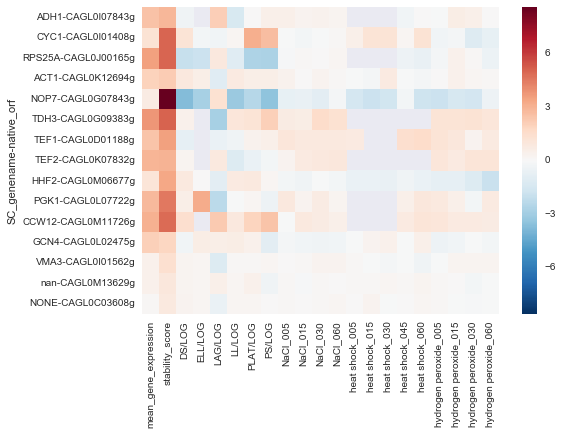

In [123]:
#Read in orf/name file and make it a dictionary
SC_features_fname = os.path.normpath(base_dir + "\microarray_data\\ortholog_files\\SGD_features.tab")
SC_features = pd.read_csv(SC_features_fname, sep = '\t', header=None)
SC_orfs = SC_features.groupby(1).get_group('ORF')

#Makes a dictionary to look up orfs by gene names.  This won't include all orfs - those without names had NaN in column 4 so 
#are presumably left out. 
SC_orfs_lookup = dict(zip(SC_orfs[4], SC_orfs[3]))
SC_genename_lookup = dict(zip(SC_orfs[3], SC_orfs[4]))

SC_genenames = [ 'ADH1', 'CYC1', 'RPS25A', 'ACT1', 'NOP7', 'TDH3','TEF1','TEF2','HHF2','PGK1','CCW12']

#SC_orfs = [SC_orfs_lookup[name] for name in SC_genenames]

#For a given species read in the ortholog file, make a dictionary
orth_file_abbrev = {'Kluyveromyces lactis': 'Klac', 'Saccharomyces cerevisiae': 'Scer', 'Candida glabrata':'Cgla', 'Saccharomyces castellii' : 'Scas', 'Saccharomyces bayanus' : 'Sbay'}
species = 'Candida glabrata'

orth_fname = orth_file_abbrev['Saccharomyces cerevisiae'] + "-" + orth_file_abbrev[species] + "-orthologs.txt"
orth_fname = os.path.normpath(base_dir + "\microarray_data\\ortholog_files\\" + orth_fname)
#There are some orfs that have multiple orthologs - in that case both will be used
with open(orth_fname) as f:
    orth_lookup = {}
    for line in f:
        linesp = line.split()
        orth_lookup[linesp[0]]= linesp[1:]
        
#For the given list of SC genes find the orthologs
#This handles a situation where one SC orf has two orthologs. 
native_orf_orthologs = []
for genename in SC_genenames: 
    orf = SC_orfs_lookup[genename]
    orf_orthologs = orth_lookup[orf]
    for orf_ortholog in orf_orthologs: 
        native_orf_orthologs.append([orf_ortholog, genename])


#Add in native orfs of interest
native_orfs_empirical = ['CAGL0L02475g','CAGL0I01562g', 'CAGL0M13629g', 'CAGL0C03608g']
#Find SC Orthologs (if any)

orth_fname_rev = orth_file_abbrev[species] + "-" + orth_file_abbrev['Saccharomyces cerevisiae'] + "-orthologs.txt"
orth_fname_rev = os.path.normpath(base_dir + "\microarray_data\\ortholog_files\\" + orth_fname_rev)
#There are some orfs that have multiple orthologs - in that case both will be used
with open(orth_fname_rev) as f:
    orth_lookup_rev = {}
    for line in f:
        linesp = line.split()
        orth_lookup_rev[linesp[0]]= linesp[1:]

for native_orf in native_orfs_empirical:
    orf_orthologs_rev = orth_lookup_rev[native_orf]
    for orf_ortholog_rev in orf_orthologs_rev:
        try: 
            SC_genename = SC_genename_lookup[orf_ortholog_rev]
        except KeyError as e:
            print 'No S.Cerevisiae ortholog for : ' + native_orf
            SC_genename = orf_ortholog_rev
        native_orf_orthologs.append([native_orf, SC_genename])

native_orfs = [orth[0] for orth in native_orf_orthologs]
SC_genename = [orth[1] for orth in native_orf_orthologs]
display_order = [jj for jj in range(len(native_orf_orthologs))]

native_orf_ortholog_dict = {}
native_orf_ortholog_dict['display_order'] = display_order
native_orf_ortholog_dict['SC_genename'] = SC_genename
native_orf_ortholog_df = pd.DataFrame(native_orf_ortholog_dict, index = native_orfs)

#Make a dataframe from the list by selecting correct data from condition arrays
#sorting is required to extract data with slice 
condition_arrays.sort_index(inplace = True)
plotted_genes = condition_arrays.loc[(slice(None),[ortholog[0] for ortholog in native_orf_orthologs]),: ]  
#Get rid of ID index
plotted_genes.index = plotted_genes.index.droplevel(0)

#Add new columns for each ortholog
plotted_genes = pd.concat([native_orf_ortholog_df, plotted_genes], axis = 1)

#Make new multiindex with the SC_genename first
plotted_genes.set_index(['SC_genename',plotted_genes.index], inplace = True)
plotted_genes.index.names = ['SC_genename', 'native_orf']

#Sort by N_display
plotted_genes.sort_values('display_order', inplace = True)

#remove expression and stability flags as well as order columns for plotting
plotted_genes = plotted_genes.iloc[:,1:-2]

sns.heatmap(plotted_genes)


#Visualize with heatmap 


In [121]:


a = 
a.columns


Index([u'mean_gene_expression', u'stability_score', u'DS/LOG', u'ELL/LOG',
       u'LAG/LOG', u'LL/LOG', u'PLAT/LOG', u'PS/LOG', u'NaCl_005', u'NaCl_015',
       u'NaCl_030', u'NaCl_060', u'heat shock_005', u'heat shock_015',
       u'heat shock_030', u'heat shock_045', u'heat shock_060',
       u'hydrogen peroxide_005', u'hydrogen peroxide_015',
       u'hydrogen peroxide_030', u'hydrogen peroxide_060'],
      dtype='object')

,,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060,top_N_expression,top_N_stability
ID,orf_name,,,,,,,,,,,,,,,,,,,,,
10301,CAGL0K02079g,-0.131332,0.693779,-0.119622,-0.243470,-0.179267,-0.116954,0.122764,0.113045,0.014514,0.155652,...,NaN,NaN,0.130266,0.257463,0.069566,0.076472,0.214117,-0.011092,True,True
12070,CAGL0C03608g,0.085725,0.848276,0.280785,0.160571,-0.602517,0.180745,0.162082,0.022420,0.100176,0.051958,...,0.286786,-0.009925,0.029658,0.180048,0.119627,-0.033622,-0.067979,-0.041599,True,True
11854,CAGL0M13629g,0.429600,0.957396,0.231493,0.162007,0.523245,0.166025,0.410288,-0.380391,0.089348,-0.101879,...,0.126396,0.183405,0.067607,0.215445,0.122711,0.042194,-0.257963,-0.030072,True,True
14674,CAGL0F05269g,0.107406,0.979752,-0.233976,-0.104431,-0.600580,-0.092055,-0.237542,-0.524032,-0.030095,-0.068516,...,-0.214778,-0.214922,-0.129480,0.014849,0.064783,0.063786,-0.230527,-0.054104,True,True
15213,CAGL0J05434g,0.124553,1.198442,0.036810,-0.553627,-0.838873,-0.063393,-0.399990,-0.291286,-0.037359,0.058830,...,0.239094,0.246287,-0.050984,-0.055319,-0.116770,-0.016016,-0.094655,-0.062823,True,True
11393,CAGL0I05720g,-0.174689,1.215851,0.157764,0.129349,-0.627165,0.364680,0.585777,0.264088,-0.266854,0.103006,...,NaN,NaN,0.062834,0.165125,-0.266163,-0.011689,-0.415650,0.011894,True,True
13712,CAGL0L12452g,-0.253552,1.242131,-0.206318,-0.069384,-0.225101,0.032748,-0.311105,-0.878839,0.177113,0.117977,...,-0.206573,-0.328801,-0.196860,-0.366861,-0.040992,-0.293623,-0.276665,-0.108735,True,True
14463,CAGL0L04246g,-0.205280,1.248095,-0.553087,-0.258972,-0.158795,-0.145266,-0.586459,-0.682670,-0.254510,-0.057411,...,0.312797,NaN,-0.030482,-0.263377,-0.027703,0.184470,0.092255,-0.106820,True,True
11751,CAGL0I01562g,0.457961,1.389245,0.206085,0.148387,-1.147969,0.079915,0.116479,0.136580,0.056099,0.080599,...,-0.052986,-0.190528,-0.043950,-0.360810,-0.011350,0.211152,0.222583,0.217366,True,True


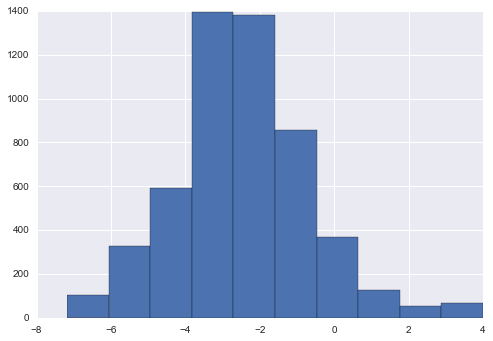

In [61]:
plt.hist(condition_arrays.loc[:,'mean_gene_expression'])
desired_genes


In [56]:
#desired_genes.loc['CAGL0I01408g']
a = desired_genes.sort_index()
a.loc[(slice(None),'CAGL0L05962g'),:]
#desired_genes.loc[(slice(None),'CAGL0L05962g'),:]

,,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060,top_N_expression,top_N_stability
ID,orf_name,,,,,,,,,,,,,,,,,,,,,
13875,CAGL0L05962g,-0.287067,1.915124,-0.83617,-0.4666,-1.059998,-0.535718,-0.296572,-0.563036,-0.13062,0.688872,...,-0.005872,-0.125241,-0.114272,0.13391,0.12507,0.418577,0.199667,-0.191205,True,True


In [63]:
b = condition_arrays.sort_index()
#b.loc[(slice(None),'CAGL0I01408g'),:]
b.loc[(slice(None),'CAGL0I01562g'),:]


,,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060,top_N_expression,top_N_stability
ID,orf_name,,,,,,,,,,,,,,,,,,,,,
11751,CAGL0I01562g,0.457961,1.389245,0.206085,0.148387,-1.147969,0.079915,0.116479,0.13658,0.056099,0.080599,...,-0.052986,-0.190528,-0.04395,-0.36081,-0.01135,0.211152,0.222583,0.217366,True,True


(array([  1.98800000e+03,   2.08700000e+03,   7.18000000e+02,
          3.11000000e+02,   1.19000000e+02,   2.80000000e+01,
          6.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          2.00000000e+00]),
 array([  0.13309169,   2.63789172,   5.14269176,   7.6474918 ,
         10.15229183,  12.65709187,  15.16189191,  17.66669194,
         20.17149198,  22.67629202,  25.18109206]),
 <a list of 10 Patch objects>)

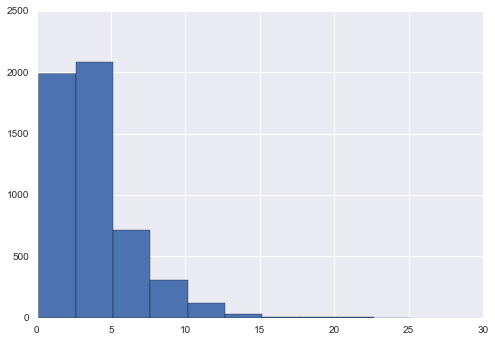

In [62]:
plt.hist(condition_arrays.loc[:,'stability_score'])
        

In [64]:

plotted_genes

,,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,NaCl_060,heat shock_005,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060
native_orf,SC_genename,,,,,,,,,,,,,,,,,,,,,
CAGL0I07843g,ADH1,2.497717,2.865752,-0.368192,NaN,2.129052,-1.384803,0.067107,0.515510,0.516057,0.282440,...,0.243894,NaN,NaN,NaN,-0.309172,0.064826,-0.039160,0.658050,0.517763,0.000554
CAGL0I01408g,CYC1,1.222305,4.989645,1.209768,-0.236757,-0.275788,0.189022,3.116947,2.682898,-0.017802,-0.211143,...,0.116529,0.528694,1.158922,1.159781,0.150228,1.226398,-0.283596,-0.156502,-1.111274,-0.677445
CAGL0J00165g,RPS25A,3.546781,4.998252,-2.002652,-1.841723,0.914959,-1.073585,-2.648761,-2.718501,-0.086689,0.116218,...,0.173942,NaN,NaN,NaN,-0.447740,-0.658548,-0.173958,0.419935,0.110019,-0.524951
CAGL0K12694g,ACT1,0.457961,1.389245,0.206085,0.148387,-1.147969,0.079915,0.116479,0.136580,0.056099,0.080599,...,0.311922,0.081435,-0.052986,-0.190528,-0.043950,-0.360810,-0.011350,0.211152,0.222583,0.217366
CAGL0G07843g,NOP7,0.687480,8.611059,-3.762976,-2.883984,1.288242,-3.202030,-2.450911,-3.493761,-0.699014,-0.664382,...,-0.140080,-1.508603,-1.845340,-1.636389,-0.220636,-1.793031,-1.855605,-1.437639,-1.550217,-0.425246
CAGL0G09383g,TDH3,0.429600,0.957396,0.231493,0.162007,0.523245,0.166025,0.410288,-0.380391,0.089348,-0.101879,...,0.041932,0.073285,0.126396,0.183405,0.067607,0.215445,0.122711,0.042194,-0.257963,-0.030072
CAGL0D01188g,TEF1,0.085725,0.848276,0.280785,0.160571,-0.602517,0.180745,0.162082,0.022420,0.100176,0.051958,...,0.182084,0.041602,0.286786,-0.009925,0.029658,0.180048,0.119627,-0.033622,-0.067979,-0.041599
CAGL0K07832g,TEF2,2.906643,2.997224,0.239155,NaN,0.863132,-1.145955,-0.560894,-0.244541,0.320276,0.780316,...,0.943748,NaN,NaN,NaN,NaN,NaN,1.038256,0.780752,1.099281,1.099766
CAGL0M06677g,HHF2,2.474056,3.543957,-0.773666,NaN,-0.541083,-0.340814,0.338217,0.515121,1.018375,0.813431,...,0.831717,0.799946,NaN,NaN,1.412799,1.556251,1.172814,0.945347,0.329834,0.778752


In [92]:
condition_arrays.sort_index(inplace = True)
#Remove ID index
plotted_genes = condition_arrays.loc[(slice(None),[ortholog[1] for ortholog in native_orf_orthologs]),: ]  

#for orth in native_orf_orthologs:
orth = native_orf_orthologs[0]  

print plotted_genes
plotted_genes.index = plotted_genes.index.droplevel(0)
plotted_genes
#new_index = [ind[1] for ind in plotted_genes.index.values]
#new_index = pd.Index(new_index)
#plotted_genes.reindex(new_index, level = 'orf_name' )


                    mean_gene_expression  stability_score    DS/LOG   ELL/LOG  \
ID    orf_name                                                                  
11009 CAGL0I07843g              2.497717         2.865752 -0.368192       NaN   
11578 CAGL0I01408g              1.222305         4.989645  1.209768 -0.236757   
11697 CAGL0J00165g              3.546781         4.998252 -2.002652 -1.841723   
11751 CAGL0I01562g              0.457961         1.389245  0.206085  0.148387   
11783 CAGL0G07843g              0.687480         8.611059 -3.762976 -2.883984   
11854 CAGL0M13629g              0.429600         0.957396  0.231493  0.162007   
12070 CAGL0C03608g              0.085725         0.848276  0.280785  0.160571   
12692 CAGL0K07832g              2.906643         2.997224  0.239155       NaN   
12842 CAGL0D01188g              2.474056         3.543957 -0.773666       NaN   
13009 CAGL0L07722g              2.762691         4.517352  0.601159  3.188049   
13168 CAGL0L02475g          

,mean_gene_expression,stability_score,DS/LOG,ELL/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,...,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060,top_N_expression,top_N_stability
orf_name,,,,,,,,,,,,,,,,,,,,,
CAGL0I07843g,2.497717,2.865752,-0.368192,NaN,2.129052,-1.384803,0.067107,0.515510,0.516057,0.282440,...,NaN,NaN,-0.309172,0.064826,-0.039160,0.658050,0.517763,0.000554,True,False
CAGL0I01408g,1.222305,4.989645,1.209768,-0.236757,-0.275788,0.189022,3.116947,2.682898,-0.017802,-0.211143,...,1.158922,1.159781,0.150228,1.226398,-0.283596,-0.156502,-1.111274,-0.677445,True,False
CAGL0J00165g,3.546781,4.998252,-2.002652,-1.841723,0.914959,-1.073585,-2.648761,-2.718501,-0.086689,0.116218,...,NaN,NaN,-0.447740,-0.658548,-0.173958,0.419935,0.110019,-0.524951,True,False
CAGL0I01562g,0.457961,1.389245,0.206085,0.148387,-1.147969,0.079915,0.116479,0.136580,0.056099,0.080599,...,-0.052986,-0.190528,-0.043950,-0.360810,-0.011350,0.211152,0.222583,0.217366,True,True
CAGL0G07843g,0.687480,8.611059,-3.762976,-2.883984,1.288242,-3.202030,-2.450911,-3.493761,-0.699014,-0.664382,...,-1.845340,-1.636389,-0.220636,-1.793031,-1.855605,-1.437639,-1.550217,-0.425246,True,False
CAGL0M13629g,0.429600,0.957396,0.231493,0.162007,0.523245,0.166025,0.410288,-0.380391,0.089348,-0.101879,...,0.126396,0.183405,0.067607,0.215445,0.122711,0.042194,-0.257963,-0.030072,True,True
CAGL0C03608g,0.085725,0.848276,0.280785,0.160571,-0.602517,0.180745,0.162082,0.022420,0.100176,0.051958,...,0.286786,-0.009925,0.029658,0.180048,0.119627,-0.033622,-0.067979,-0.041599,True,True
CAGL0K07832g,2.906643,2.997224,0.239155,NaN,0.863132,-1.145955,-0.560894,-0.244541,0.320276,0.780316,...,NaN,NaN,NaN,NaN,1.038256,0.780752,1.099281,1.099766,True,False
CAGL0D01188g,2.474056,3.543957,-0.773666,NaN,-0.541083,-0.340814,0.338217,0.515121,1.018375,0.813431,...,NaN,NaN,1.412799,1.556251,1.172814,0.945347,0.329834,0.778752,True,False


In [94]:
native_orf_orthologs

[(0, 'CAGL0I07843g', 'ADH1'),
 (1, 'CAGL0I01408g', 'CYC1'),
 (2, 'CAGL0J00165g', 'RPS25A'),
 (3, 'CAGL0K12694g', 'ACT1'),
 (4, 'CAGL0G07843g', 'NOP7'),
 (5, 'CAGL0G09383g', 'TDH3'),
 (6, 'CAGL0D01188g', 'TEF1'),
 (7, 'CAGL0K07832g', 'TEF2'),
 (8, 'CAGL0M06677g', 'HHF2'),
 (9, 'CAGL0L07722g', 'PGK1'),
 (10, 'CAGL0M11726g', 'CCW12'),
 (11, 'CAGL0L02475g', 'GCN4'),
 (12, 'CAGL0I01562g', 'VMA3'),
 (13, 'CAGL0M13629g', nan),
 (14, 'CAGL0C03608g', 'NONE')]

In [4]:
native_orfs = [orth[0] for orth in native_orf_orthologs]
SC_genename = [orth[1] for orth in native_orf_orthologs]
display_order = [jj for jj in range(len(native_orf_orthologs))]

native_orf_ortholog_dict['display_order'] = display_order
native_orf_ortholog_dict['SC_genename'] = SC_genename
native_orf_ortholog_df = pd.DataFrame[native_orf_ortholog_dict, index = native_orfs]

In [29]:
native_orf_orthologs = [['a','z'],['b','y'],['c','y'],['a','x']]
SC_genenames = [orth[1] for orth in native_orf_orthologs ]
native_orfs = [orth[0] for orth in native_orf_orthologs ]

remove_ind = []
for orf in list(set(native_orfs)):
    count = 0
    for ii, jj in enumerate(native_orfs):
        if jj == orf:
            count = count + 1
            if count >1:
                remove_ind.append(ii)
                print 'duplicate orf mapping for {}, removed {} '.format(orf,SC_genenames[ii])
            
remove_ind = sorted(remove_ind, reverse=True)
for ind in remove_ind:
    SC_genenames.pop(ind)
    native_orfs.pop(ind)

print SC_genenames
print native_orfs

duplicate orf mapping for a, removed x 
['z', 'y', 'y']
['a', 'b', 'c']
